#Hypothesis Testing

Hypothesis Testing is the first step we take towards understanding the data. Hypothesis Testing gives us the head-start towards understanding the problem.

Gender: Males are more likely to buy Vehicle Insurance.

Age: It is generally said that it is profitable to buy Insurance as early as possible so more likely btw Customers of age between 25-40 age are likely to buy Insurance .

Driving_License: Customers who generally have Driving_License take Insurance.

Previously_Insured: Customers generally take One Vehicle insurance.

Vehicle_Age: The more the vehicle_age the better.

Annual_Premium: Customers generally opt for Insurance where Premium is not too high.

#Loading Packages

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Dataset

In [83]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [192]:
test_org=pd.read_csv('/content/test.csv')

In [84]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


In [85]:
test

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
...,...,...,...,...,...,...,...,...,...,...,...
127032,508142,Female,26,1,37.0,1,< 1 Year,No,30867.0,152.0,56
127033,508143,Female,38,1,28.0,0,1-2 Year,Yes,28700.0,122.0,165
127034,508144,Male,21,1,46.0,1,< 1 Year,No,29802.0,152.0,74
127035,508145,Male,71,1,28.0,1,1-2 Year,No,62875.0,26.0,265


In [86]:
train.shape

(381109, 12)

In [87]:
test.shape

(127037, 11)

#Basic EDA

In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


There is no missing value in the data.

By looking at the info of the dataset we can get a rough idea on the numeric and the string columns

In [89]:
col=train.columns.tolist()
col.remove('id')
train[col].describe(percentiles = [.25,.50,.75,.95,.99])



,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
95%,69.000000,1.000000,47.000000,1.000000,55176.000000,160.000000,285.000000,1.000000
99%,77.000000,1.000000,50.000000,1.000000,72963.000000,160.000000,297.000000,1.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


By looking at the summary of the data we can infer the mean,standard deviation, min and max of the data

We will be able to get a idea on the outliers here by the percentiles ( In the Annual_Premium the 99th percentile is 72963 and the max is 540165 this represents the outliers in this column)

#Univariate Analysis:

In this section, we will do univariate analysis. It is the simplest form of analyzing data where we examine each variable individually.

For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable.

For numerical features, probability density plots can be used to look at the distribution of the variable.

#Response (Target variable)

**Target Variable**

We will first look at the target variable, i.e., **Response**. 

As it is a binary classification(1/0) variable, let us look at its frequency table, percentage distribution and bar plot.

Frequency table of a variable will give us the count of each category in that variable.

Percentage of target class

0    87.743664
1    12.256336
Name: Response, dtype: float64


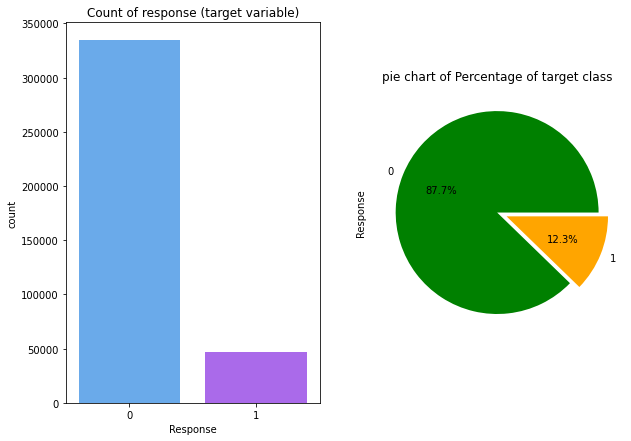

In [90]:
plt.subplot(1,2,1)
sns.countplot(train['Response'],palette='cool')
plt.title("Count of response (target variable)")
plt.subplot(1,2,2)
count=train['Response'].value_counts()
count.plot.pie(autopct = '%1.1f%%',colors=['green','orange'], figsize = (10,7),explode = [0,0.1],title = "pie chart of Percentage of target class")
print( "Percentage of target class\n")
print(train['Response'].value_counts()/len(train)*100)


By the plot we can say that this is the problem of imbalance binary classification problem

The indivisuals interested is 87 % as compared to the othe one.

#Gender variable

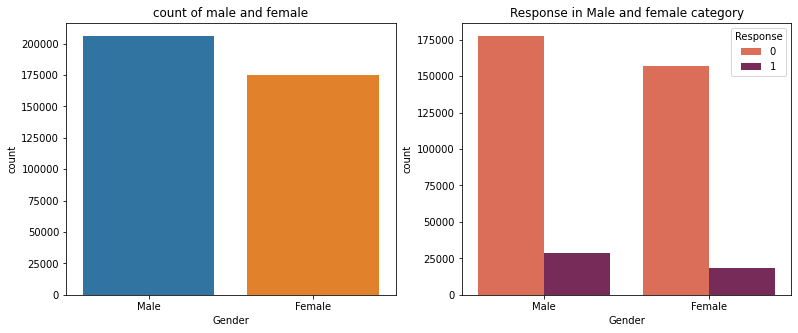

In [91]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Gender'])
plt.title("count of male and female")
plt.subplot(1,2,2)
sns.countplot(train['Gender'], hue = train['Response'],palette="rocket_r")
plt.title("Response in Male and female category")
plt.show()

The gender variable in the dataset is almost equally distributed

Male category is slightly greater than that of female and chances of buying the insurance is also little high.

#Age variable

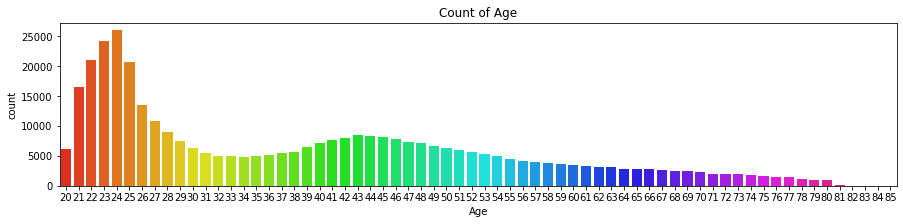

In [92]:
plt.figure(figsize = (15,3))
sns.countplot(train['Age'], palette = 'hsv')
plt.title('Count of Age')
plt.show()

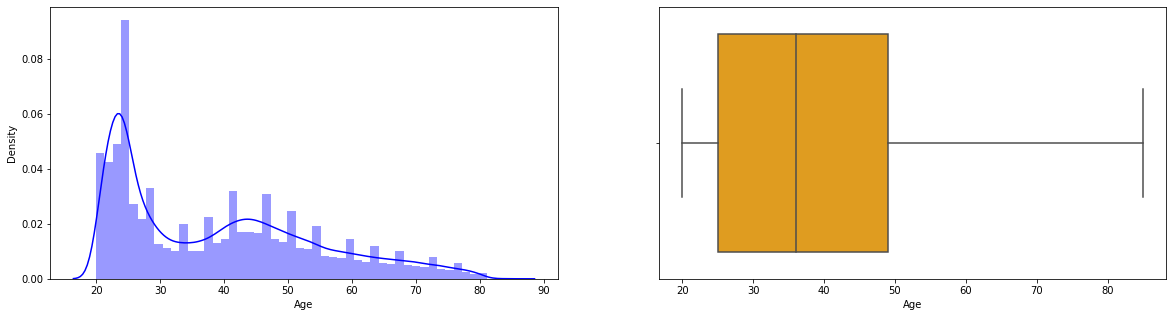

In [93]:
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(20,5))
axx = ax.flatten()
sns.distplot(train['Age'] ,ax = axx[0],color='Blue')
sns.boxplot(train['Age'],ax = axx[1],color='Orange')

Count of the indivisuals with age 24 are greater in the dataset

Variable Age looks like right skewed

From the boxplot we observe that here is not serious outliers in the data

#Driving License

Percentage of  Driving_License feature
 
1    99.786938
0     0.213062
Name: Driving_License, dtype: float64


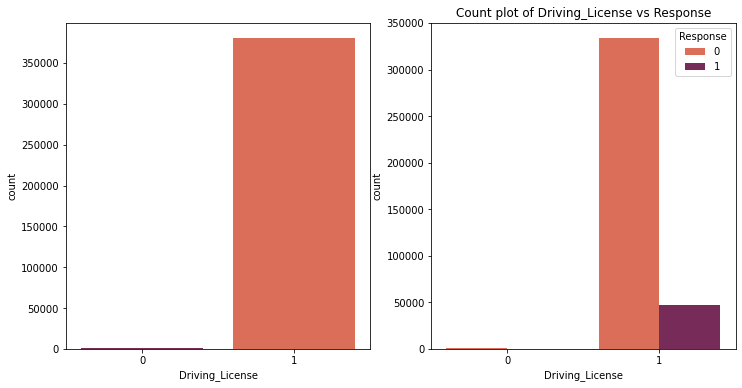

In [94]:
print("Percentage of  Driving_License feature\n ")
print(train['Driving_License'].value_counts()/len(train)*100)
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,6))
axx = ax.flatten()
plt.title("Count plot of Driving_License vs Response")
sns.countplot(train['Driving_License'],ax = axx[0],palette = 'rocket')
sns.countplot('Driving_License', hue = 'Response',ax =axx[1],data = train,palette="rocket_r")

Customers who have the DL are 99%

Customers who are interested in Vehicle Insurance almost all have driving license

#Region Code

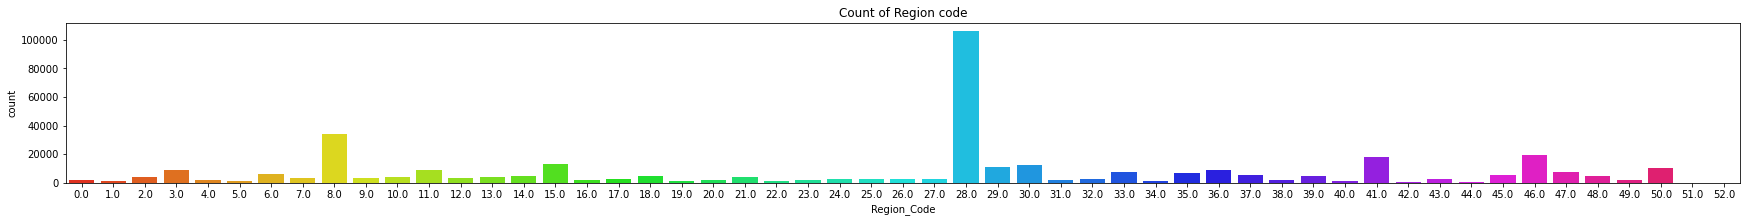

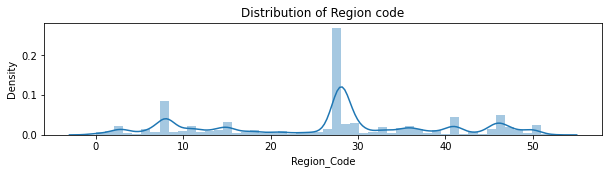

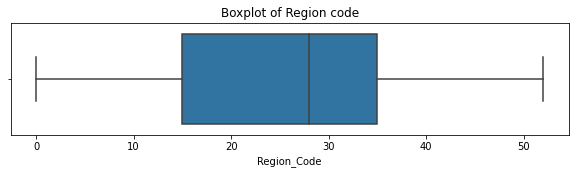

In [95]:
plt.figure(figsize = (30,10))
plt.subplot(3,1,1)
sns.countplot(train['Region_Code'], palette = 'hsv')
plt.title('Count of Region code')
plt.figure(figsize = (10,7))
plt.subplot(3,1,2)
sns.distplot(train['Region_Code'])
plt.title('Distribution of Region code')
plt.figure(figsize = (10,7))
plt.subplot(3,1,3)
sns.boxplot(train['Region_Code'])
plt.title('Boxplot of Region code')
plt.show()

The indivisuals with region code 28 the highest as compared to the other ones

From the box plot it looks like there is no outliers in the data

Further we can analyze which region has highest intrested customers

#Previously Insured 

Percentage ofPreviously_Insured feature
 
0    54.178988
1    45.821012
Name: Previously_Insured, dtype: float64


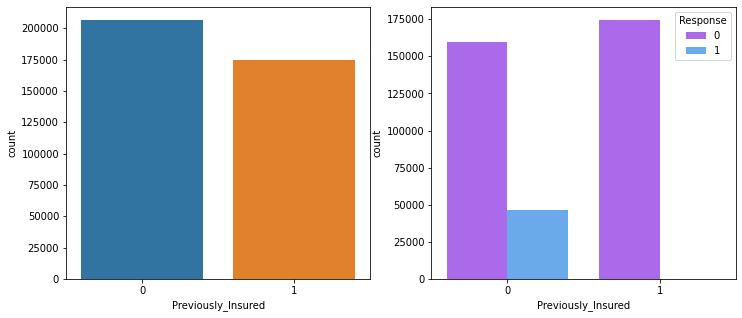

In [96]:
print("Percentage ofPreviously_Insured feature\n ")
print(train['Previously_Insured'].value_counts()/len(train)*100)
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
axx = ax.flatten()
sns.countplot(train['Previously_Insured'],ax = axx[0])
sns.countplot('Previously_Insured', hue = 'Response',ax =axx[1],data = train,palette="cool_r")

The variable perviosly insured almost has equal count

Customer who are not perviosly insured are likely to be inetrested

#Vehicle Age

Percentage of vechicle age feature with respect to mean responce
 
Vehicle_Age
1-2 Year     0.173755
< 1 Year     0.043705
> 2 Years    0.293746
Name: Response, dtype: float64


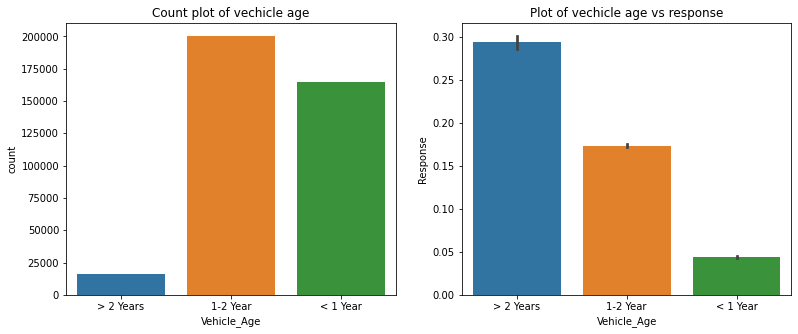

In [97]:
print("Percentage of vechicle age feature with respect to mean responce\n ")
print(train.groupby('Vehicle_Age')['Response'].mean())
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Vehicle_Age'])
plt.title("Count plot of vechicle age")
plt.subplot(1,2,2)
plt.title("Plot of vechicle age vs response")
sns.barplot(x='Vehicle_Age',y='Response',data=train)



From the above figure it is clear that the more the age of vehicle the better making the vehicle insurance cheaper

#Vechicle damage 

Percentage of vechicle damage feature
 
Yes    50.487656
No     49.512344
Name: Vehicle_Damage, dtype: float64


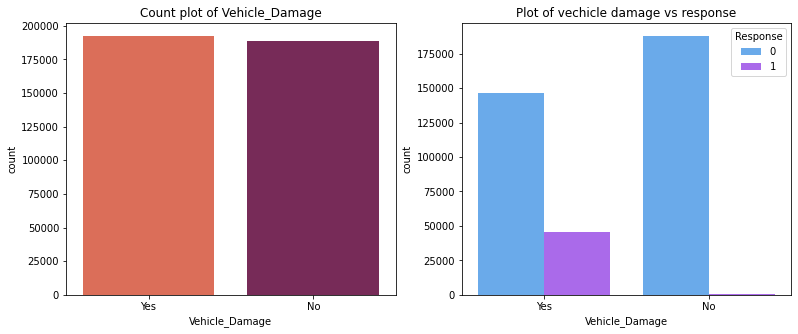

In [98]:
print("Percentage of vechicle damage feature\n ")
print(train['Vehicle_Damage'].value_counts()/len(train)*100)
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(train['Vehicle_Damage'],palette="rocket_r")
plt.title("Count plot of Vehicle_Damage")
plt.subplot(1,2,2)
plt.title("Plot of vechicle damage vs response")
sns.countplot('Vehicle_Damage', hue = 'Response',data = train,palette="cool")

Customers with vechicle damage(Yes and NO) are equally distributed with (50.48 % , 49.51 %)

Customers with vechicle damage are more interested in Vehicle Insurance

#Annual_Premium

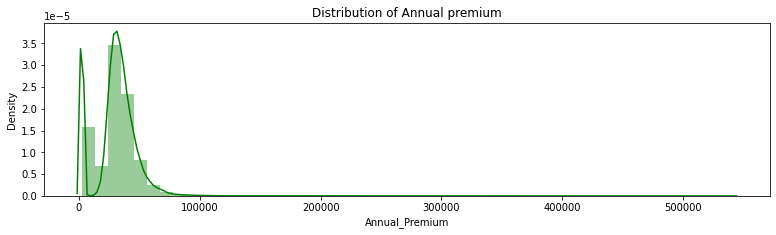

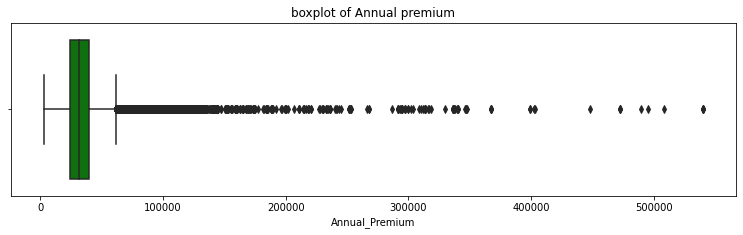

In [99]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(train['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()
#print("-------------------------------------")
plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(train['Annual_Premium'],color='green')
plt.title("boxplot of Annual premium")
plt.show()

From the distribution plot we can infer that the annual premimum variable is right skewed

From the boxplot we can observe lot of outliers in the variable

We can see that customers generally opt for Premium which is not too high.

#Policy_Sales_Channel

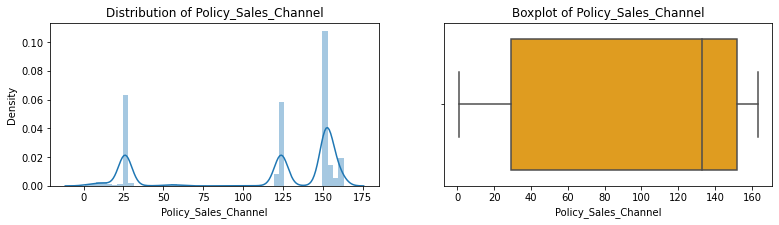

In [100]:
plt.figure(figsize = (20,3))

plt.subplot(1,3,1)
plt.title("Distribution of Policy_Sales_Channel")
sns.distplot(train['Policy_Sales_Channel'])

plt.subplot(1,3,2)
plt.title("Boxplot of Policy_Sales_Channel")
sns.boxplot(train['Policy_Sales_Channel'],color='Orange')

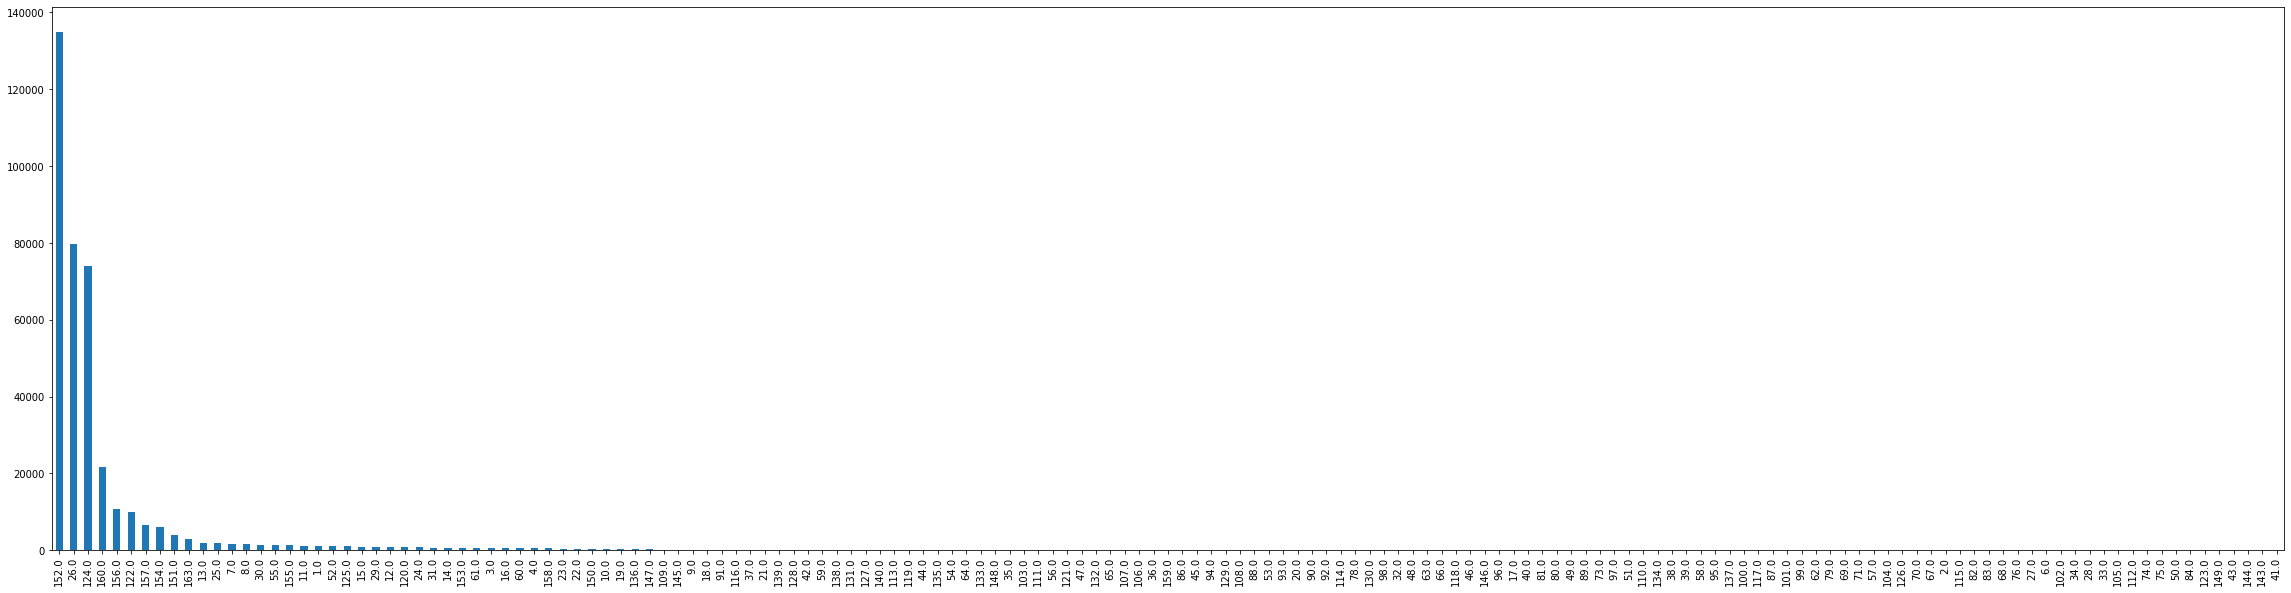

In [101]:
plt.figure(figsize=(40,10))
train['Policy_Sales_Channel'].value_counts().plot.bar()

Policy_Sales_Channel no. 152 have higest number of customers.

Policy_Sales_Channel no. [152,26,124,160,156,122,157,154,151,163] have most of the customers.

#Vintage

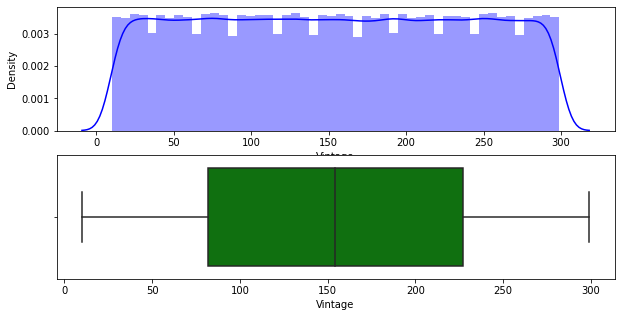

In [102]:
f,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,5))
axx = ax.flatten()
sns.distplot(train['Vintage'],ax=axx[0], color='Blue')
sns.boxplot(train['Vintage'],ax=axx[1],color='green')

In [103]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


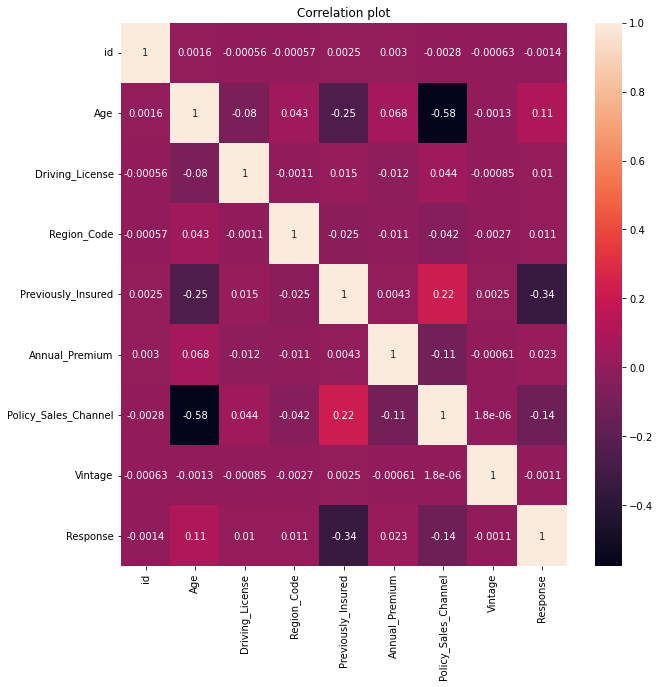

In [104]:
plt.figure(figsize=(10,10))
plt.title("Correlation plot")
sns.heatmap(train.corr(), annot=True,)

From the correlation plot we observe that policy sales channel has slightly greater correlation with Age variable, this may be the indication of multicollinearity. We can futher use VIF to check this

**Missing Value and Outlier Treatment**

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

**Missing value imputation**

Let’s list out feature-wise count of missing values.

In [105]:
train.isnull().values.any()

False

In [106]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

There are missing values in Annual_premium, Policy_Sales_Channel, Vintage, Response features.

We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

• For numerical variables: imputation using mean or median

• ** For categorical variables:** imputation using mode

There are very less missing values in Annual_premium, Policy_Sales_Channel, Vintage, Response features so we can fill them using the mode of the features.

In [107]:
train['Annual_Premium'].fillna(train['Annual_Premium'].mode()[0],inplace=True)
train['Policy_Sales_Channel'].fillna(train['Policy_Sales_Channel'].mode()[0],inplace=True)
train['Vintage'].fillna(train['Vintage'].mode()[0],inplace=True)
train['Response'].fillna(train['Response'].mode()[0],inplace=True)

Now lets check whether all the missing values are filled in the dataset.

In [108]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [109]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

#Label Encoding

Now we will do label encoding for the categorical variables. label encoding turns categorical variables into a series of 0 and 1,2 making them lot easier to quantify and compare. Let us understand the process of label encoding first:

•	Consider the “Gender” variable. It has two classes, Male and Female.

•	As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.

•	Once we apply label encoding to this variable, it will convert the “Gender” variable values into two values(0 and 1), i.e. Male and Female.

•	Male will have a value of 1 and  if the gender is Female  value is 0.

In [110]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [111]:
train['Vehicle_Age'] = le.fit_transform(train['Vehicle_Age'])
train['Gender'] = le.fit_transform(train['Gender'])
train['Vehicle_Damage'] = le.fit_transform(train['Vehicle_Damage'])
test['Gender'] = le.fit_transform(test['Gender'])
test['Vehicle_Age'] = le.fit_transform(test['Vehicle_Age'])
test['Vehicle_Damage'] = le.fit_transform(test['Vehicle_Damage'])


train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [112]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,1,25,1,11.0,1,1,0,35786.0,152.0,53
1,381111,1,40,1,28.0,0,0,1,33762.0,7.0,111
2,381112,1,47,1,28.0,0,0,1,40050.0,124.0,199
3,381113,1,24,1,27.0,1,1,1,37356.0,152.0,187
4,381114,1,27,1,28.0,1,1,0,59097.0,152.0,297


**Outlier Treatment**

As we saw earlier in univariate analysis, Annual_premium contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. 

Outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets. 

Due to these outliers bulk of the data in the Annual_premium is at the left and the right tail is longer. This is called **right skewness**. 

One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much, but reduces the larger values. 

So, we get a distribution similar to normal distribution.

Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.


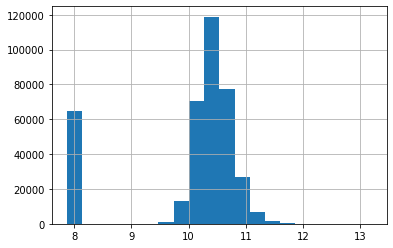

In [113]:
train['Annual_Premium_log']=np.log(train['Annual_Premium'])
train['Annual_Premium_log'].hist(bins=20)
test['Annual_Premium_log']=np.log(test['Annual_Premium'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. 

Let’s build a logistic regression model and make predictions for the test dataset.

In [114]:
train.shape

(381109, 13)

#Feature Engineering

In this section we will try the Discretisation of continous column using Decision Tree.
Discretisation is a process of converting the continous variable into discrete variable with the help of bins.

In this section we will convert the continous variable('Age','Annual_Premium') into discrete variable .

Steps to Follow:

Spit the data into train_test and fit the Decision Tree(depth=1,2,3,4) using the X=continous variable ; y=Target

The continous variable are then replaced by the predicted_probability.

In [115]:
from sklearn.model_selection import train_test_split
X=train[['Age','Annual_Premium','Response']]
y=train['Response']

x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2)

In [116]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(max_depth=2)
dtree.fit(x_train.Age.to_frame(),y_train)

DecisionTreeClassifier(max_depth=2)

In [117]:
x_train['Age_tree']=dtree.predict_proba(x_train.Age.to_frame())[:,1]

In [118]:
x_train.head()

,Age,Annual_Premium,Response,Age_tree
275905,33,41453.0,0,0.201034
195653,22,20089.0,0,0.036814
293289,52,42310.0,0,0.201034
6065,45,2630.0,0,0.201034
18646,25,35506.0,0,0.036814


In [119]:
x_train['Age_tree'].unique()

array([0.2010345 , 0.03681361, 0.08399201, 0.10398756])

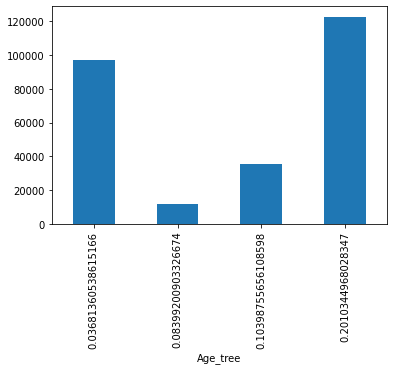

In [120]:
x_train.groupby('Age_tree')['Response'].count().plot.bar()

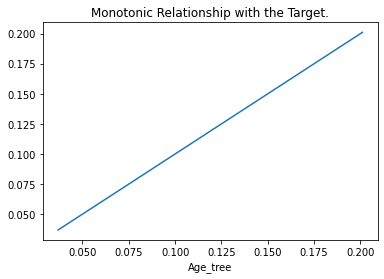

In [121]:
x_train.groupby('Age_tree')['Response'].mean().plot()
plt.title('Monotonic Relationship with the Target.')
plt.show()

We can see that the new column: Age_tree is a good predictor of the Target.

We can use the Predicted_probability to create the Bins.

In [122]:
age_limit=pd.DataFrame({'min_age':x_train.groupby('Age_tree')['Age'].min(),'max_age':x_train.groupby('Age_tree')['Age'].max()})
age_limit

,min_age,max_age
Age_tree,,
0.036814,20,27
0.083992,28,29
0.103988,59,85
0.201034,30,58


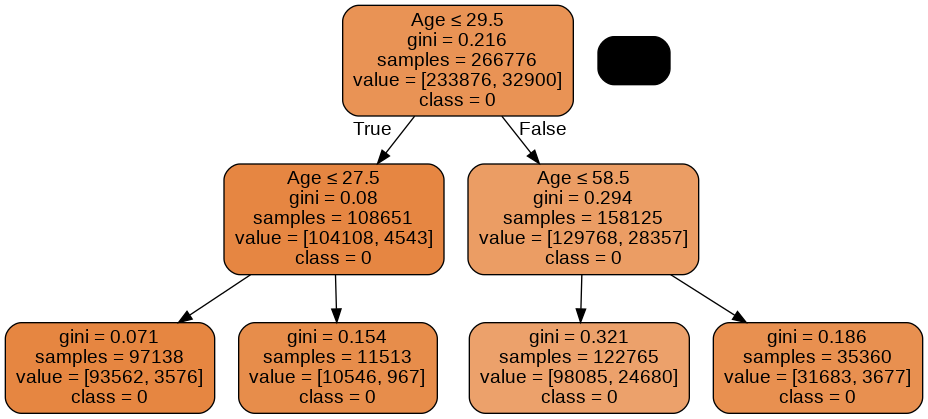

In [123]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,filled=True,  
                 rounded=True,
                special_characters=True,feature_names=['Age'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

Image(graph.create_png())

Hyper-parameter Tuning to check the best depth.

In [124]:
from sklearn.model_selection import cross_val_score
score_ls=[]
score_std_ls=[]
for tree_depth in [1,2,3,4]:
  tree_model=DecisionTreeClassifier(max_depth=tree_depth)
  score=cross_val_score(tree_model,x_train.Age.to_frame(),y_train,cv=3,scoring='roc_auc')
  score_ls.append(np.mean(score))
  score_std_ls.append(np.std(score))
temp=pd.concat([pd.Series([1,2,3,4]),pd.Series(score_ls),pd.Series(score_std_ls)],axis=1)
temp.columns=['depth', 'roc_auc_mean', 'roc_auc_std']
print(temp)

   depth  roc_auc_mean  roc_auc_std
0      1      0.653528     0.002830
1      2      0.683938     0.002064
2      3      0.689069     0.002108
3      4      0.695761     0.002520


We can see that with depth=2 is a better choice to avoid overfitting.

We replaced the continous colum with the bins.

In [125]:
train.loc[(train['Age']>=20) & (train['Age']<27),'Age_label']='Teenangers'
train.loc[(train['Age']>=27) & (train['Age']<29),'Age_label']='Young'
train.loc[(train['Age']>=29) & (train['Age']<58),'Age_label']='Middle Age'
train.loc[(train['Age']>=58) & (train['Age']<=85),'Age_label']='Old Age'

train.loc[(train['Age']>=20) & (train['Age']<27),'Age']=0
train.loc[(train['Age']>=27) & (train['Age']<29),'Age']=1
train.loc[(train['Age']>=29) & (train['Age']<58),'Age']=2
train.loc[(train['Age']>=58) & (train['Age']<=85),'Age']=3

In [126]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_log,Age_label
0,1,1,2,1,28.0,0,2,1,40454.0,26.0,217,1,10.607921,Middle Age
1,2,1,3,1,3.0,0,0,0,33536.0,26.0,183,0,10.420375,Old Age
2,3,1,2,1,28.0,0,2,1,38294.0,26.0,27,1,10.553049,Middle Age
3,4,1,0,1,11.0,1,1,0,28619.0,152.0,203,0,10.261826,Teenangers
4,5,0,2,1,41.0,1,1,0,27496.0,152.0,39,0,10.221796,Middle Age


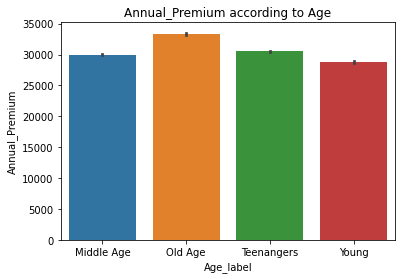

In [127]:
sns.barplot(train['Age_label'],train['Annual_Premium'])
plt.title('Annual_Premium according to Age')
plt.show()

From the above Plot we can see that Annual_Premium is directly dependent on the Age of the Customer. The higher the age higher the Annual_Premium.

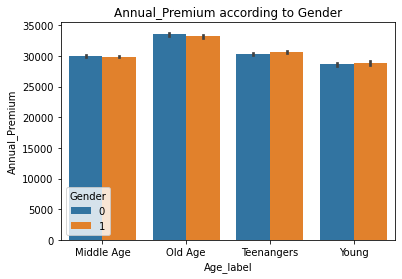

In [128]:
sns.barplot(train['Age_label'],train['Annual_Premium'],hue=train['Gender'])
plt.title('Annual_Premium according to Gender')
plt.show()

There is not much to see from the above plot.

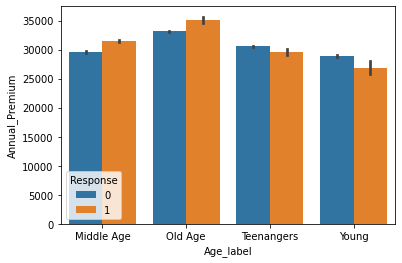

In [129]:
sns.barplot(train['Age_label'],train['Annual_Premium'],hue=train['Response'])


We can see that:

Age group 20-27 usually do not take Insurance as they are just starting with their lives and may not have money to pay the Premium.

Age group from 29-85 opt for Insurance as they have driving License and resources to pay the Premium.

We shall do the same for Annual_Premium column as well.

In [130]:
tree=DecisionTreeClassifier(max_depth=2)
tree.fit(x_train.Annual_Premium.to_frame(),y_train)

x_train['Annual_premium_tree']=tree.predict_proba(x_train.Annual_Premium.to_frame())[:,1]

In [131]:
x_train['Annual_premium_tree'].unique()

array([0.14019373, 0.10877935, 0.13156156, 0.15365861])

In [132]:
x_train

,Age,Annual_Premium,Response,Age_tree,Annual_premium_tree
275905,33,41453.0,0,0.201034,0.140194
195653,22,20089.0,0,0.036814,0.108779
293289,52,42310.0,0,0.201034,0.140194
6065,45,2630.0,0,0.201034,0.131562
18646,25,35506.0,0,0.036814,0.108779
...,...,...,...,...,...
84434,43,34569.0,0,0.201034,0.108779
95816,54,44982.0,0,0.201034,0.140194
203245,59,2630.0,0,0.103988,0.131562
100879,58,2630.0,0,0.201034,0.131562


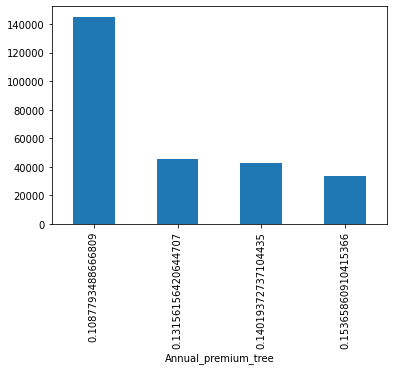

In [133]:
x_train.groupby('Annual_premium_tree')['Response'].count().plot.bar()

Text(0.5, 1.0, 'Monotonic Relationship with Target')

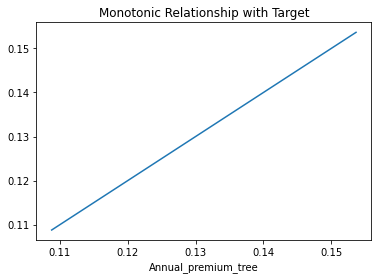

In [134]:
x_train.groupby('Annual_premium_tree')['Response'].mean().plot()
plt.title('Monotonic Relationship with Target')

In [135]:
Annual_premium_tree_limit=pd.concat([x_train.groupby('Annual_premium_tree')['Annual_Premium'].min(),x_train.groupby('Annual_premium_tree')['Annual_Premium'].max()],axis=1)
Annual_premium_tree_limit

,Annual_Premium,Annual_Premium
Annual_premium_tree,,
0.108779,10004.0,38085.0
0.131562,2630.0,9816.0
0.140194,38086.0,46170.0
0.153659,46171.0,540165.0


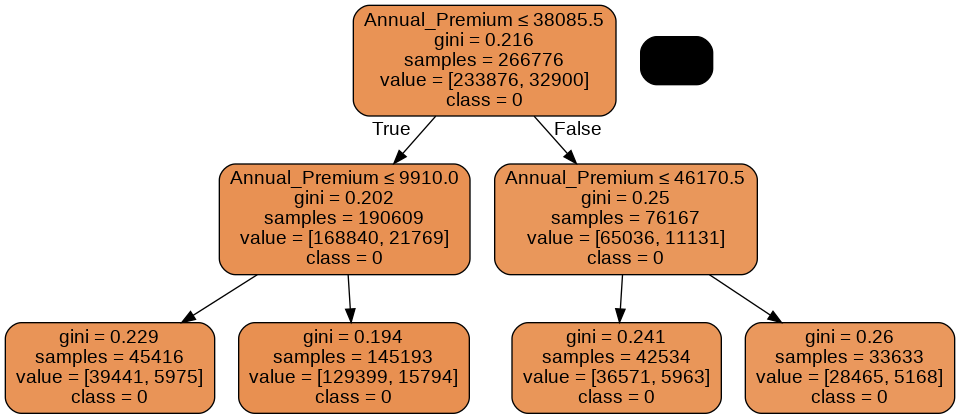

In [136]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

dot_data=StringIO()
export_graphviz(tree,out_file=dot_data,feature_names=['Annual_Premium'],class_names=['0','1'],rounded=True,filled=True,special_characters=True)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [137]:
train.loc[(train['Annual_Premium']>=2630.0) &(train['Annual_Premium']<9816.0),'Annual_Premium_label']='Low_Premium'
train.loc[(train['Annual_Premium']>=9816.0) & (train['Annual_Premium']<38085.0),'Annual_Premium_label']='Average_Premium'
train.loc[(train['Annual_Premium']>=38085.0) & (train['Annual_Premium']<46170.0),'Annual_Premium_label']='Above_avg_premium'
train.loc[(train['Annual_Premium']>=46170.0) & (train['Annual_Premium']<=540165.0),'Annual_Premium_label']='High_premium'

train.loc[(train['Annual_Premium']>=2630.0) &(train['Annual_Premium']<9816.0),'Annual_Premium']=0
train.loc[(train['Annual_Premium']>=9816.0) & (train['Annual_Premium']<38085.0),'Annual_Premium']=1
train.loc[(train['Annual_Premium']>=38085.0) & (train['Annual_Premium']<46170.0),'Annual_Premium']=2
train.loc[(train['Annual_Premium']>=46170.0) & (train['Annual_Premium']<=540165.0),'Annual_Premium']=3

In [138]:
score_ls=[]
score_std_ls=[]
for tree_depth in [1,2,3,4]:
  tree_model=DecisionTreeClassifier(max_depth=tree_depth)
  score=cross_val_score(tree_model,x_train.Annual_Premium.to_frame(),y_train,cv=3,scoring='roc_auc')
  score_ls.append(np.mean(score))
  score_std_ls.append(np.std(score))
temp=pd.concat([pd.Series([1,2,3,4]),pd.Series(score_ls),pd.Series(score_std_ls)],axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
print(temp)

   depth  roc_auc_mean  roc_auc_std
0      1      0.529599     0.000910
1      2      0.540527     0.000477
2      3      0.547035     0.001000
3      4      0.547878     0.001473


We can see that there is not much difference in roc_auc score we we will use depth=2.

In [139]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Annual_Premium_log,Age_label,Annual_Premium_label
0,1,1,2,1,28.0,0,2,1,2.0,26.0,217,1,10.607921,Middle Age,Above_avg_premium
1,2,1,3,1,3.0,0,0,0,1.0,26.0,183,0,10.420375,Old Age,Average_Premium
2,3,1,2,1,28.0,0,2,1,2.0,26.0,27,1,10.553049,Middle Age,Above_avg_premium
3,4,1,0,1,11.0,1,1,0,1.0,152.0,203,0,10.261826,Teenangers,Average_Premium
4,5,0,2,1,41.0,1,1,0,1.0,152.0,39,0,10.221796,Middle Age,Average_Premium


In [140]:
test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Annual_Premium_log
0,381110,1,25,1,11.0,1,1,0,35786.0,152.0,53,10.485312
1,381111,1,40,1,28.0,0,0,1,33762.0,7.0,111,10.427091
2,381112,1,47,1,28.0,0,0,1,40050.0,124.0,199,10.597884
3,381113,1,24,1,27.0,1,1,1,37356.0,152.0,187,10.528249
4,381114,1,27,1,28.0,1,1,0,59097.0,152.0,297,10.986935


In [141]:
train.drop(['id','Age_label','Annual_Premium_label','Annual_Premium'],axis=1,inplace=True)
test.drop(['id','Annual_Premium'],axis=1,inplace=True)

In [142]:
train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,Annual_Premium_log
0,1,2,1,28.0,0,2,1,26.0,217,1,10.607921
1,1,3,1,3.0,0,0,0,26.0,183,0,10.420375
2,1,2,1,28.0,0,2,1,26.0,27,1,10.553049
3,1,0,1,11.0,1,1,0,152.0,203,0,10.261826
4,0,2,1,41.0,1,1,0,152.0,39,0,10.221796


**Evaluation Metrics for Classification Problems**

•Accuracy: Let us understand it using the confusion matrix which is a tabular representation of Actual vs Predicted values. 

•	True Positive - Targets which are actually true(Y) and we have predicted them true(Y)

•	True Negative - Targets which are actually false(N) and we have predicted them false(N)

•	False Positive - Targets which are actually false(N) but we have predicted them true(T)

•	False Negative - Targets which are actually true(T) but we have predicted them false(N)

Using these values, we can calculate the accuracy of the model. The accuracy is given by:

•Precision: It is a measure of correctness achieved in true prediction i.e. of observations labeled as true, how many are actually labeled true. 

Precision = TP / (TP + FP)

•Recall(Sensitivity) - It is a measure of actual observations which are predicted correctly i.e. how many observations of true class are labeled correctly. It is also known as ‘Sensitivity’. 

Recall = TP / (TP + FN)

•Specificity - It is a measure of how many observations of false class are labeled correctly. 

Specificity = TN / (TN + FP)

Specificity and Sensitivity plays a crucial role in deriving ROC curve.

•	Receiver Operating Characteristic(ROC) summarizes the model’s performance by evaluating the trade offs between true positive rate (sensitivity) and false positive rate(1- specificity).

The area under curve (AUC), referred to as index of accuracy(A) or concordance index, is a perfect performance metric for ROC curve. Higher the area under curve, better the prediction power of the model.


**Model Building : Part I**

Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.

•	Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables.

•	Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.

•	This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function


#Splitting data for training and validation

Sklearn requires the target variable in a separate dataset. 

So, we will drop our target variable from the train dataset and save it in another dataset.


We will build the following models in this section.

•	Logistic Regression

•	Decision Tree

•	Random Forest

•	XGBoost

•	KNeighbour Classifier

In [143]:
X=train.drop('Response',axis=1)
y=train['Response']

In [144]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.30)

#Logistic Regression Model

In [145]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear',random_state=0)
lr.fit(X_train,y_train)


LogisticRegression(random_state=0, solver='liblinear')

Let’s predict the Response for validation set and calculate its accuracy.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.813


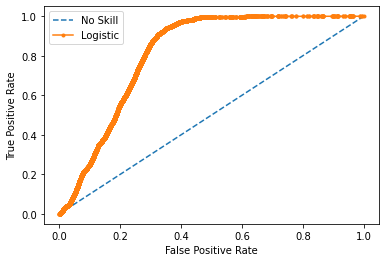

In [146]:
from sklearn.metrics import roc_curve
ns_probs = [0 for _ in range(len(y_test))]

lr_probs = lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot

plt.show()

We can see that with using simplest Classification Algorithm we are able to get ROC-AUC score as 0.814.

We can see that its is a case of Imbalanced dataset. So we will apply some techniques.

In [147]:
y_pred=lr.predict(X_test)

In [148]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8774369604576107

In [149]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_balanced,Y_balanced=sm.fit_resample(X,y)
x_train_balc,x_test_balc,y_train_balc,y_test_balc=train_test_split(X_balanced,Y_balanced,test_size=0.3,random_state=5)

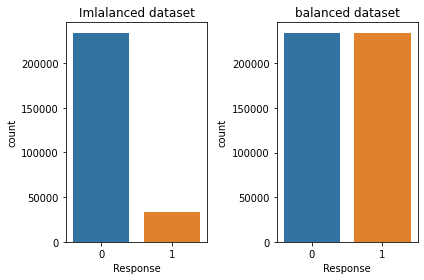

In [150]:
plt.subplot(121)
sns.countplot(y_train)
plt.title('Imlalanced dataset')


plt.subplot(122)
sns.countplot(y_train_balc)
plt.title('balanced dataset')
plt.tight_layout()
plt.show()

After balancing the response variable apply logistic regression model and check accuracy score is incresed or not.

In [151]:
lr_balanced=LogisticRegression(solver='liblinear',random_state=0)
lr_balanced.fit(x_train_balc,y_train_balc)

LogisticRegression(random_state=0, solver='liblinear')

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.830


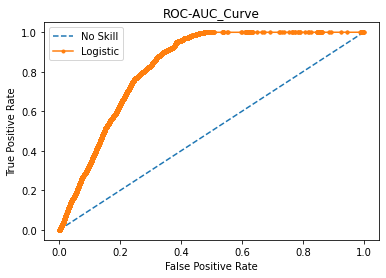

In [152]:
## After Balancing
ns_probs = [0 for _ in range(len(y_test_balc))]


lr_probs = lr_balanced.predict_proba(x_test_balc)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test_balc, ns_probs)
lr_auc = roc_auc_score(y_test_balc, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_balc, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_balc, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot

plt.title('ROC-AUC_Curve')

plt.show()

We can clearly see that after Balancing the ratio of target variable . Our ROC-AUC score has increased to from 0.81 to 0.83.

#Testing across various models.

In [153]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
models=[]
models.append(('LogisticRegression',LogisticRegression(solver="liblinear", random_state=5)))
models.append(('DecisionTree',DecisionTreeClassifier(random_state=5)))
models.append(('RandomForest',RandomForestClassifier(random_state=5)))

models.append(('knn',KNeighborsClassifier()))

In [154]:
from xgboost.compat import KFold
results=[]
names=[]
for name,model in models:
  kf=KFold(n_splits=5,shuffle=True,random_state=5)
  score=cross_val_score(model,X_balanced,Y_balanced,cv=kf,scoring='roc_auc',verbose=1)
  results.append(score)
  names.append(name)
  msg='%s :%f (%f)'%(name,score.mean(),score.std())
  print(msg)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   29.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LogisticRegression :0.830226 (0.001165)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   25.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


DecisionTree :0.846939 (0.001262)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed: 11.6min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RandomForest :0.942293 (0.000135)
knn :0.907821 (0.000953)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   51.4s finished


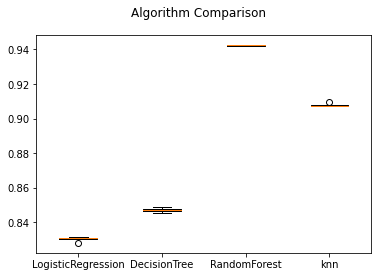

In [155]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#Cross validation using StratifiedKFold

We will learn about stratified k-fold cross validation. Let us understand how it works:

•	Stratification is the process of rearranging the data so as to ensure that each fold is a good representative of the whole.

•	For example, in a binary classification problem where each class comprises of 50% of the data, it is best to arrange the data such that in every fold, each class comprises of about half the instances.

•	It is generally a better approach when dealing with both bias and variance.

•	A randomly selected fold might not adequately represent the minor class, 
particularly in cases where there is a huge class imbalance.

In [156]:
from sklearn.model_selection import StratifiedKFold

In [157]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
  print('\n{} of kfold {}'.format(i,kf.n_splits))
  xtr,xvl = X.loc[train_index],X.loc[test_index]
  ytr,yvl = y[train_index],y[test_index]

  model = LogisticRegression(random_state=1)
  model.fit(xtr, ytr)

  pred_test = model.predict(xvl)
  score = accuracy_score(yvl,pred_test)
  print('accuracy_score',score)

  i+=1
  pred_test = model.predict(test)
  pred=model.predict_proba(xvl)[:,1]
  


1 of kfold 5
accuracy_score 0.8773582430269476

2 of kfold 5
accuracy_score 0.8763217968565506

3 of kfold 5
accuracy_score 0.8767678622969747

4 of kfold 5
accuracy_score 0.8774107213140563

5 of kfold 5
accuracy_score 0.8773303945106992


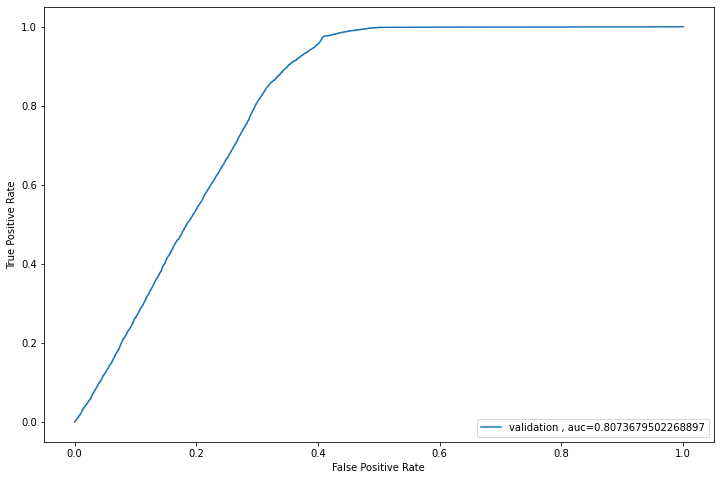

In [158]:
from sklearn import metrics
fpr,tpr,_=metrics.roc_curve(yvl,pred)
auc=metrics.roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label='validation , auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#Decision Tree Classifier


In [159]:
from sklearn.tree import DecisionTreeClassifier
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
  print('\n {} of kfold {} '.format(i,kf.n_splits))
  xtr,xvl=X.loc[train_index],X.loc[test_index]
  ytr,yvl=y[train_index],y[test_index]

  model=DecisionTreeClassifier(random_state=1)
  model.fit(xtr,ytr)
  pred_test=model.predict(xvl)
  score=accuracy_score(yvl,pred_test)
  print('accuracy score : ',score)
  i+=1
  pred_test1=model.predict(test)
  pred_prob=model.predict_proba(xvl)[:,1]



 1 of kfold 5 
accuracy score :  0.822741465718559

 2 of kfold 5 
accuracy score :  0.8232006507307601

 3 of kfold 5 
accuracy score :  0.8230169767258797

 4 of kfold 5 
accuracy score :  0.8247225210569127

 5 of kfold 5 
accuracy score :  0.8246677424856667


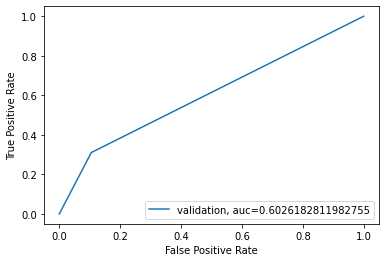

In [160]:
fpr,tpr,_=roc_curve(yvl,pred_prob)
auc=roc_auc_score(yvl,pred_prob)
plt.plot(fpr,tpr,label='validation, auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#Random Forest Classifier

In [161]:
from sklearn.ensemble import RandomForestClassifier
n=1
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
for train_index,test_index in kf.split(X,y):
  print('\n {} of kfold {} '.format(n,kf.n_splits))
  xtr,xvl=X.loc[train_index],X.loc[test_index]
  ytr,yvl=y[train_index],y[test_index]

  model=RandomForestClassifier(random_state=1,max_depth=10)
  model.fit(xtr,ytr)
  pred_test=model.predict(xvl)
  acc=accuracy_score(yvl,pred_test)
  print('accuracy score : ',acc)
  n+=1

  pred_test=model.predict(test)
  pred_prob=model.predict_proba(xvl)[:,1]


 1 of kfold 5 
accuracy score :  0.8774369604576107

 2 of kfold 5 
accuracy score :  0.8774369604576107

 3 of kfold 5 
accuracy score :  0.8774369604576107

 4 of kfold 5 
accuracy score :  0.8774238408858335

 5 of kfold 5 
accuracy score :  0.87743535246192


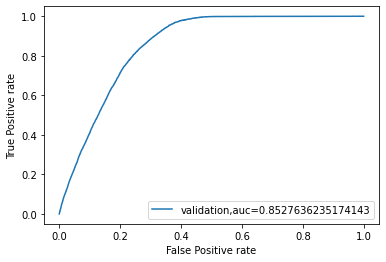

In [162]:
fpr,tpr,_=roc_curve(yvl,pred_prob)
auc=roc_auc_score(yvl,pred_prob)
plt.plot(fpr,tpr,label='validation,auc='+str(auc))
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.legend(loc=4)
plt.show()

We will try to improve the accuracy by tuning the hyperparameters for this model. 
We will use grid search to get the optimized values of hyper parameters. 

**Grid-search** is a way to select the best of a family of hyper parameters, parametrized by a grid of parameters.
We will tune the max_depth and n_estimators parameters. max_depth decides the maximum depth of the tree and n_estimators decides the number of trees that will be used in random forest model.


In [163]:
from sklearn.model_selection import GridSearchCV
paramgrid={'max_depth':list(range(1,20,2)),'n_estimators':list(range(1,80,20))}
grid_cv=GridSearchCV(RandomForestClassifier(max_depth=1,random_state=1),param_grid=paramgrid)
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [164]:
grid_cv.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(max_depth=1, random_state=1),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'n_estimators': [1, 21, 41, 61]})

In [165]:
grid_cv.best_estimator_

RandomForestClassifier(max_depth=11, n_estimators=41, random_state=1)

So, the optimized value for the max_depth variable is 11 and for n_estimator is 41. Now let’s build the model using these optimized values.

In [166]:
i=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
  print('\n {} of kfold {} '.format(i,kf.n_splits))
  xtr,xvl=X.loc[train_index],X.loc[test_index]
  ytr,yvl=y[train_index],y[test_index]
  
  model=RandomForestClassifier(n_estimators=41,max_depth=11,random_state=1)
  model.fit(xtr,ytr)
  pred_test=model.predict(xvl)
  acc=accuracy_score(yvl,pred_test)
  print('accuracy score : ',acc)
  i+=1
  pred_test=model.predict(test)
  pred2=model.predict_proba(xvl)[:,1]


 1 of kfold 5 
accuracy score :  0.8774238408858335

 2 of kfold 5 
accuracy score :  0.8774763191729422

 3 of kfold 5 
accuracy score :  0.8774369604576107

 4 of kfold 5 
accuracy score :  0.8774107213140563

 5 of kfold 5 
accuracy score :  0.87743535246192


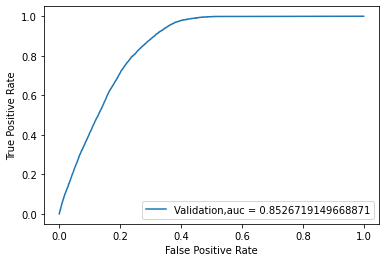

In [167]:
fpr,tpr,_=roc_curve(yvl,pred2)
auc=roc_auc_score(yvl,pred2)
plt.plot(fpr,tpr,label='Validation,auc = '+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

Let us find the feature importance now, i.e. which features are most important for this problem. We will use feature_importances_ attribute of sklearn to do so.

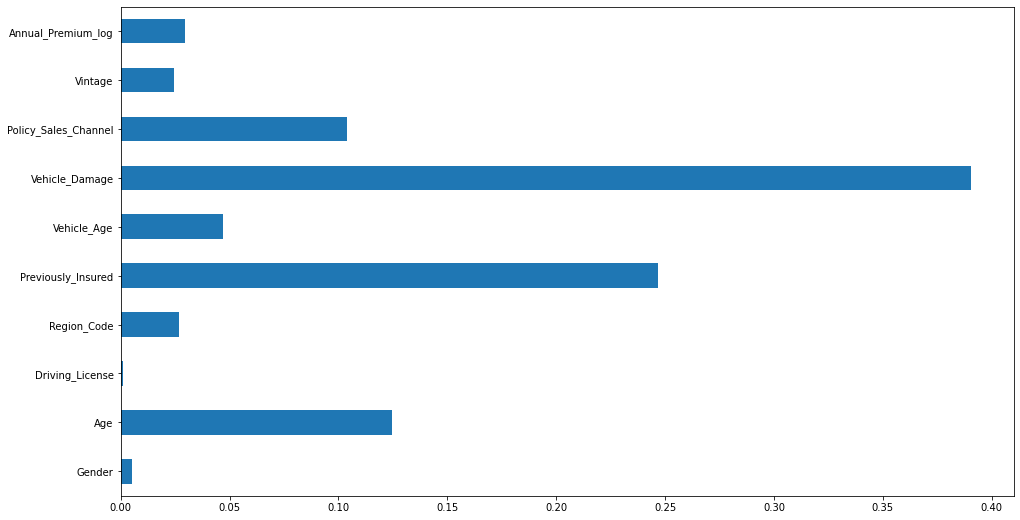

In [168]:
importances=pd.Series(model.feature_importances_,index=X.columns)
importances.plot(kind='barh',figsize=(16,9))

We can see that vehicle_damage is the most important feature followed by previously_insured,Age, policy_sales_channel. So, feature engineering helped us in predicting our target variable.

XGBoost

XGBoost is a fast and efficient algorithm and has been used to by the winners of many data science competitions. 

XGBoost works only with numeric variables and we have already replaced the categorical variables with numeric variables. Let’s have a look at the parameters that we are going to use in our model.

•	n_estimator: This specifies the number of trees for the model.

•	max_depth: We can specify maximum depth of a tree using this parameter.

In [169]:
from xgboost import XGBClassifier
n=1
kf=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)
for train_index,test_index in kf.split(X,y):
  print('\n {} of kfold {} :'.format(n,kf.n_splits))
  xtr,xvl=X.loc[train_index],X.loc[test_index]
  ytr,yvl=y[train_index],y[test_index]

  model=XGBClassifier(n_estimators=50,max_depth=4)
  model.fit(xtr,ytr)
  pred_test=model.predict(xvl)
  acc=accuracy_score(yvl,pred_test)
  print('accuracy score : ',acc)
  n+=1

  pred_test=model.predict(test)
  pred3=model.predict_proba(xvl)[:,1]



 1 of kfold 5 :
accuracy score :  0.8774369604576107

 2 of kfold 5 :
accuracy score :  0.8774369604576107

 3 of kfold 5 :
accuracy score :  0.8774369604576107

 4 of kfold 5 :
accuracy score :  0.8774369604576107

 5 of kfold 5 :
accuracy score :  0.87743535246192


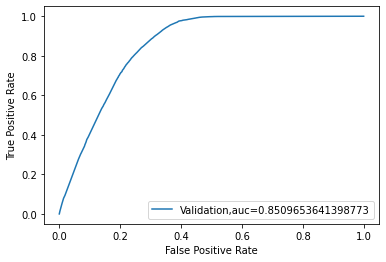

In [170]:
fpr,tpr,_=roc_curve(yvl,pred3)
auc=roc_auc_score(yvl,pred3)
plt.plot(fpr,tpr,label='Validation,auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

#KNeighbour Classifier

In [171]:
from sklearn.neighbors import KNeighborsClassifier
n=1
kf=StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
  print('\n {} of kfold {} : '.format(n,kf.n_splits))
  xtr,xvl=X.loc[train_index],X.loc[test_index]
  ytr,yvl=y[train_index],y[test_index]
  model=KNeighborsClassifier(n_neighbors=10,weights='distance',p=2,leaf_size=10)
  model.fit(xtr,ytr)
  pred_test=model.predict(xvl)
  acc=accuracy_score(yvl,pred_test)
  print('accuracy score : ',acc)
  n+=1

  pred_test=model.predict(test)
  pred4=model.predict_proba(xvl)[:,1]


 1 of kfold 5 : 
accuracy score :  0.8561701346068065

 2 of kfold 5 : 
accuracy score :  0.8588727663929049

 3 of kfold 5 : 
accuracy score :  0.8581905486604917

 4 of kfold 5 : 
accuracy score :  0.8566293196190077

 5 of kfold 5 : 
accuracy score :  0.8577819760958266


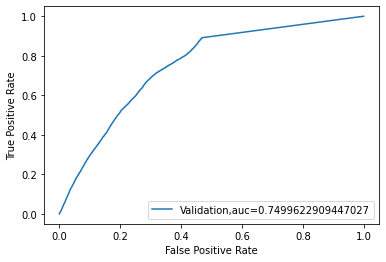

In [172]:
fpr,tpr,_=roc_curve(yvl,pred4)
auc=roc_auc_score(yvl,pred4)
plt.plot(fpr,tpr,label='Validation,auc='+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

We can see that RandomForest has performed the best so we will go with it.

we will apply the random forest model on the balanced response variable

In [173]:
rtree=RandomForestClassifier(random_state=5)
rtree.fit(x_train_balc,y_train_balc)

RandomForestClassifier(random_state=5)

In [174]:
y_pred=rtree.predict(x_test_balc)
print('roc_auc_score for Random Forest',roc_auc_score(y_test_balc,y_pred))

roc_auc_score for Random Forest 0.8693563914062096


Test Score : ROC_AUC=0.940
Train Score : ROC_AUC=1.000


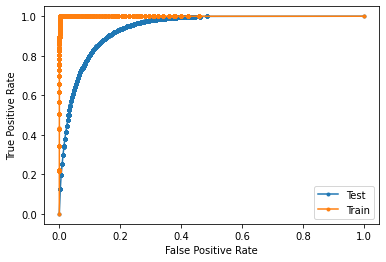

In [175]:
test_prob=rtree.predict_proba(x_test_balc)[:,1]
train_prob=rtree.predict_proba(x_train_balc)[:,1]
test_auc=roc_auc_score(y_test_balc,test_prob)
train_auc=roc_auc_score(y_train_balc,train_prob)
print('Test Score : ROC_AUC=%.3f'%(test_auc))
print('Train Score : ROC_AUC=%.3f'%(train_auc))
test_fpr,test_tpr,_=roc_curve(y_test_balc,test_prob)
train_fpr,train_tpr,_=roc_curve(y_train_balc,train_prob)
plt.plot(test_fpr,test_tpr,marker='.',label='Test')
plt.plot(train_fpr,train_tpr,marker='.',label='Train')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


We will apply XGB on balanced response variable and check the accuracy rate

In [176]:
xgb=XGBClassifier(random_state=5,max_depth=5)
xgb.fit(x_train_balc,y_train_balc)

XGBClassifier(max_depth=5, random_state=5)

Test_Score :ROC_AUC=0.906
Train_Score:ROC_AUC=0.906


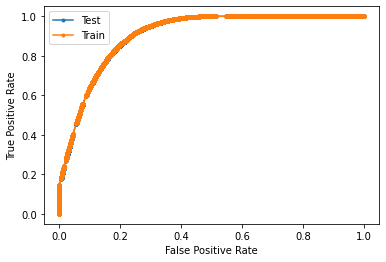

In [177]:
test_prob=xgb.predict_proba(x_test_balc)[:,1]
train_prob=xgb.predict_proba(x_train_balc)[:,1]
auc_test=roc_auc_score(y_test_balc,test_prob)
auc_train=roc_auc_score(y_train_balc,train_prob)
print('Test_Score :ROC_AUC=%.3f'%(auc_test))
print('Train_Score:ROC_AUC=%.3f'%(auc_train))
test_fpr,test_tpr,_=roc_curve(y_test_balc,test_prob)
train_fpr,train_tpr,_=roc_curve(y_train_balc,train_prob)
plt.plot(test_fpr,test_tpr,marker='.',label="Test")
plt.plot(train_fpr,train_tpr,marker='.',label="Train")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [179]:
y_pred=xgb.predict(x_test_balc)
print('ROC AUC Score of XGBClassifier :',roc_auc_score(y_test_balc,y_pred))

ROC AUC Score of XGBClassifier : 0.8329002797011592


After applying all the models random forest model is best model for this dataset.Because the accuracy rate of random forest model is greater than all of the other model.So we will make final prediction with the random forest model.

#Making final model

In [203]:
pred_test=rtree.predict(test)
pred_test

array([0, 0, 0, ..., 0, 0, 0])

In [204]:
submission=pd.DataFrame({'id':test_org['id'],'Response':pred_test})

In [205]:
submission['Response'].value_counts()

0    115440
1     11597
Name: Response, dtype: int64

In [206]:
submission.to_csv('rtree_submission.csv',index=False)